**Feature Engineering Task 1:**

In [ ]:
import pandas as pd

# Load the data from a CSV file
data = pd.read_csv("data.csv")

# Iterate through each column
for column in data.columns:
    # Check if the column has any missing or zero values
    if data[column].isna().sum() + (data[column] == 0).sum() > 0:
        # Check if the column is categorical
        if data[column].dtype == 'object':
            # Impute missing and zero values with the most frequent value
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value, inplace=True)
            data[column] = data[column].replace(0, mode_value)
           # print("Column '{}' has been updated. Missing or zero values before: {}. Missing or zero values after: {}. Imputed with value: {}".format(column, data[column].isna().sum() + (data[column] == 0).sum(), data[column].isna().sum() + (data[column] == 0).sum(), mode_value))
        # Otherwise, assume it's a continuous numerical value
        else:
            # Impute missing and zero values with the mean value
            mean_value = data[column].replace(0, pd.np.nan).mean()
            data[column].fillna(mean_value, inplace=True)
            data[column] = data[column].replace(0, mean_value)
          #  print("Column '{}' has been updated. Missing or zero values before: {}. Missing or zero values after: {}. Imputed with value: {}".format(column, data[column].isna().sum() + (data[column] == 0).sum(), data[column].isna().sum() + (data[column] == 0).sum(), mean_value))

# Save the updated data to the original CSV file

data["diagnosis"] = (data["diagnosis"] =="M").astype(int)
# data.to_csv("data.csv", index=False)
data.to_csv("featuringtask1.csv", index=False)

# Print the updated data
print(data["diagnosis"])


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


<ipython-input-1-49aa38263476>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  mean_value = data[column].replace(0, pd.np.nan).mean()


**Feature Engineering Task 2:**

In [ ]:
import pandas as pd
import numpy as np

# load the dataset as a Pandas DataFrame
df = pd.read_csv('featuringtask1.csv')

# extract the numeric columns except the first two columns and convert to a Numpy array
numeric_cols = df.iloc[:, 2:].select_dtypes(include=[np.number]).columns
dataset = df[numeric_cols].values

# calculate the mean and standard deviation of each feature
mu = np.mean(dataset, axis=0)
sigma = np.std(dataset, axis=0)

# apply feature normalization
normalized_dataset = (dataset - mu) / sigma

# update the original DataFrame with the normalized values
df.loc[:, numeric_cols] = normalized_dataset

# save the normalized dataset back to the normData.csv file
df.to_csv('normData.csv', index=False)



**Learning Task 1:**

<ipython-input-3-8fd7b9e4f2b4>:31: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
<ipython-input-3-8fd7b9e4f2b4>:31: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))


BGD 0.01 0.3: 0.7978723404255319
BGD 0.01 0.4: 0.9095744680851063
BGD 0.01 0.5: 0.9042553191489362
BGD 0.01 0.6: 0.8617021276595744
BGD 0.01 0.7: 0.7978723404255319
MBGD 0.01 0.3: 0.7978723404255319
MBGD 0.01 0.4: 0.9095744680851063
MBGD 0.01 0.5: 0.898936170212766
MBGD 0.01 0.6: 0.8617021276595744
MBGD 0.01 0.7: 0.7925531914893617
SGD 0.01 0.3: 0.9095744680851063
SGD 0.01 0.4: 0.898936170212766
SGD 0.01 0.5: 0.9095744680851063
SGD 0.01 0.6: 0.9095744680851063
SGD 0.01 0.7: 0.9042553191489362
BGD 0.001 0.3: 0.4148936170212766
BGD 0.001 0.4: 0.4148936170212766
BGD 0.001 0.5: 0.851063829787234
BGD 0.001 0.6: 0.7606382978723404
BGD 0.001 0.7: 0.6170212765957447
MBGD 0.001 0.3: 0.4148936170212766
MBGD 0.001 0.4: 0.4148936170212766
MBGD 0.001 0.5: 0.8563829787234043
MBGD 0.001 0.6: 0.7553191489361702
MBGD 0.001 0.7: 0.6170212765957447
SGD 0.001 0.3: 0.9042553191489362
SGD 0.001 0.4: 0.9095744680851063
SGD 0.001 0.5: 0.9095744680851063
SGD 0.001 0.6: 0.9095744680851063
SGD 0.001 0.7: 0.91489

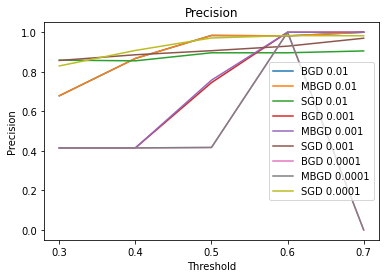

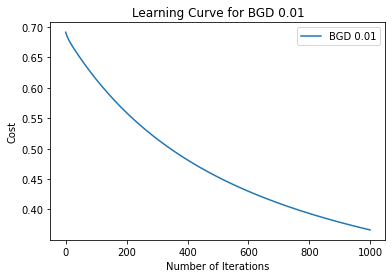

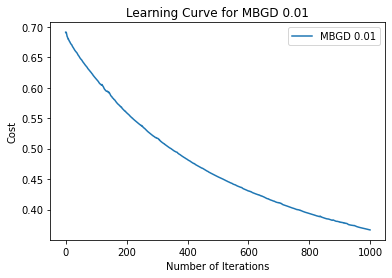

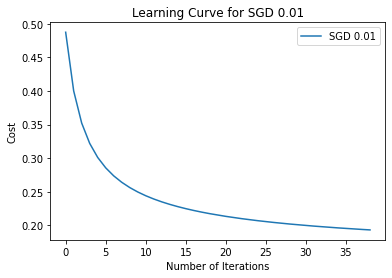

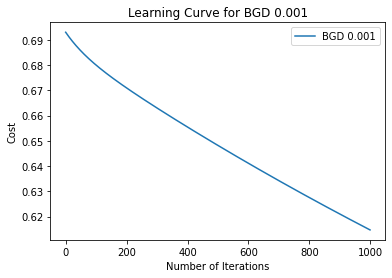

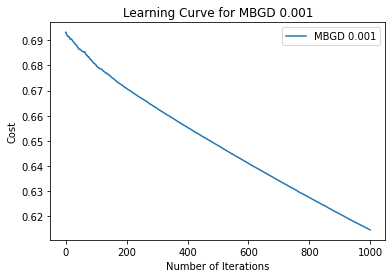

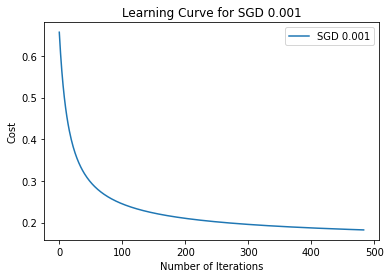

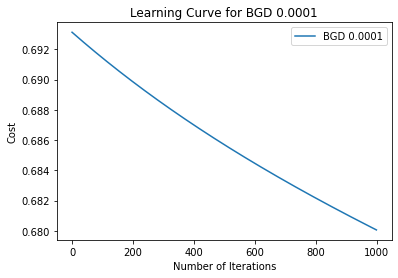

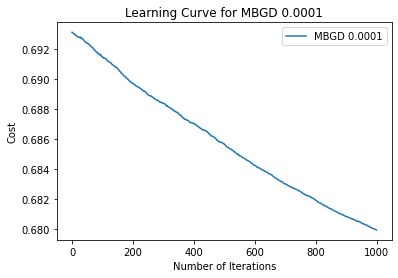

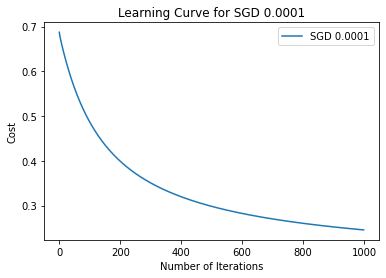

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from file
data = pd.read_csv('featuringtask1.csv')
data = data.drop(columns=['id'])  # Drop the Id column
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
X = (X - X.mean()) / X.std()

# Split data into training and testing sets
m = len(y)
indices = np.random.permutation(m)
train_indices, test_indices = indices[:int(0.67*m)], indices[int(0.67*m):]
train_X, train_y = X[train_indices], y[train_indices]
test_X, test_y = X[test_indices], y[test_indices]



def sigmoid(z):
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))


# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

    # Batch Gradient Descent
def batch_gradient_descent(X, y, alpha, num_iters):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    X = (X - X.mean())/X.std()
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        error = h - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history
# Mini-batch Gradient Descent
def minibatch_gradient_descent(X, y, batch_size, alpha, num_iters):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    X = (X - X.mean())/X.std()
    
    for i in range(num_iters):
        indices = np.random.randint(m, size=batch_size)
        X_batch, y_batch = X[indices], y[indices]
        h = sigmoid(np.dot(X_batch, theta))
        error = h - y_batch
        gradient = (1/batch_size) * np.dot(X_batch.T, error)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        
        cost_history.append(cost)
    
    return theta, cost_history
# # Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, alpha=0.01, num_iters=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    X = (X - X.mean())/X.std()
    
    for i in range(num_iters):
        for j in range(m):
            X_j, y_j = X[j], y[j]
            h = sigmoid(np.dot(X_j, theta))
            error = h - y_j
            gradient = error * X_j
            theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

# Predict function
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions

# Test accuracy function
def test_accuracy(X, y, theta, threshold=0.5):
    predictions = predict(X, theta, threshold)
    accuracy = np.mean(predictions == y)
    return accuracy


    # Train the logistic regression models using batch gradient descent, mini-batch gradient descent, and stochastic gradient descent
learning_rates = [0.01, 0.001, 0.0001]
num_iters = 1000
batch_size = 32
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

models = {}

for lr in learning_rates:
    models[f'BGD {lr}'] = batch_gradient_descent(train_X, train_y, alpha=lr, num_iters=num_iters)
    models[f'MBGD {lr}'] = minibatch_gradient_descent(train_X, train_y, batch_size=batch_size, alpha=lr, num_iters=num_iters)
    models[f'SGD {lr}'] = stochastic_gradient_descent(train_X, train_y, alpha=lr, num_iters=num_iters)
# print()
# print()
# print(models)
# print()
# print()
# Evaluate testing accuracy for each model and threshold
accuracies = {}
for key, value in models.items():
    theta = value[0]
    for threshold in thresholds:
        accuracy = test_accuracy(test_X, test_y, theta, threshold)
        accuracies[f'{key} {threshold}'] = accuracy

# Print the accuracies
for key, value in accuracies.items():
    print(f'{key}: {value}')


#precision:
# Evaluate precision for each model and threshold
precisions = {}
for key, value in models.items():
    theta = value[0]
    for threshold in thresholds:
        predictions = predict(test_X, theta, threshold)
        TP = np.sum((predictions == 1) & (test_y == 1))
        FP = np.sum((predictions == 1) & (test_y == 0))
        TN = np.sum((predictions == 0) & (test_y == 0))
        FN = np.sum((predictions == 0) & (test_y == 1))
        if TP + FP == 0:
            precision = 0
        else:
            precision = TP / (TP + FP)
        precisions[f'{key} {threshold}'] = precision

# Print the precisions
for key, value in precisions.items():
    print(f'{key}: {value}')

# Plot the precisions for each model
for key, value in models.items():
    theta = value[0]
    precisions = []
    for threshold in thresholds:
        predictions = predict(test_X, theta, threshold)
        TP = np.sum((predictions == 1) & (test_y == 1))
        FP = np.sum((predictions == 1) & (test_y == 0))
        TN = np.sum((predictions == 0) & (test_y == 0))
        FN = np.sum((predictions == 0) & (test_y == 1))
        if TP + FP == 0:
            precision = 0
        else:
            precision = TP / (TP + FP)
        precisions.append(precision)
    plt.plot(precisions, label=key)
plt.title('Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.xticks(range(len(thresholds)), thresholds)
plt.legend()
plt.show()

# Plot the learning curves for each model
for key, value in models.items():
    plt.plot(value[1], label=key)
    plt.title(f'Learning Curve for {key}')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()



**Learning task 2: **



<ipython-input-17-5bd0051c9740>:28: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
<ipython-input-17-5bd0051c9740>:28: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))


BGD 0.01 0.3: 0.9521276595744681
BGD 0.01 0.4: 0.9787234042553191
BGD 0.01 0.5: 0.9840425531914894
BGD 0.01 0.6: 0.9893617021276596
BGD 0.01 0.7: 0.9680851063829787
MBGD 0.01 0.3: 0.9521276595744681
MBGD 0.01 0.4: 0.9787234042553191
MBGD 0.01 0.5: 0.9840425531914894
MBGD 0.01 0.6: 0.9893617021276596
MBGD 0.01 0.7: 0.9680851063829787
SGD 0.01 0.3: 0.9893617021276596
SGD 0.01 0.4: 0.9893617021276596
SGD 0.01 0.5: 0.9946808510638298
SGD 0.01 0.6: 0.9840425531914894
SGD 0.01 0.7: 0.973404255319149
BGD 0.001 0.3: 0.9042553191489362
BGD 0.001 0.4: 0.9414893617021277
BGD 0.001 0.5: 0.9627659574468085
BGD 0.001 0.6: 0.9308510638297872
BGD 0.001 0.7: 0.9414893617021277
MBGD 0.001 0.3: 0.9042553191489362
MBGD 0.001 0.4: 0.9414893617021277
MBGD 0.001 0.5: 0.9627659574468085
MBGD 0.001 0.6: 0.9308510638297872
MBGD 0.001 0.7: 0.9414893617021277
SGD 0.001 0.3: 0.9787234042553191
SGD 0.001 0.4: 0.9840425531914894
SGD 0.001 0.5: 0.9946808510638298
SGD 0.001 0.6: 0.9946808510638298
SGD 0.001 0.7: 0.978

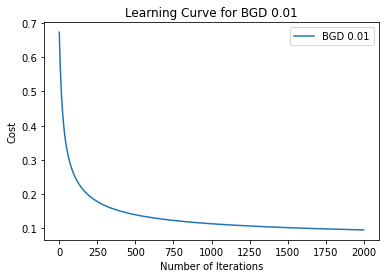

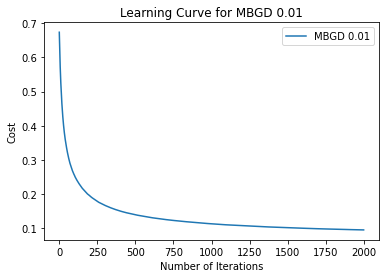

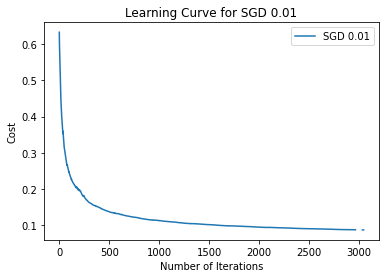

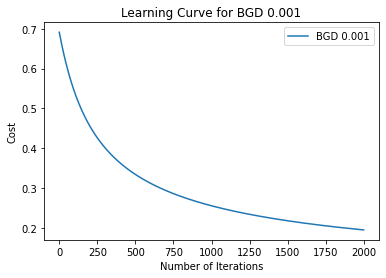

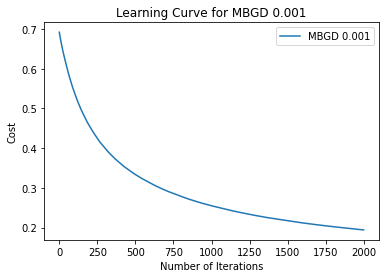

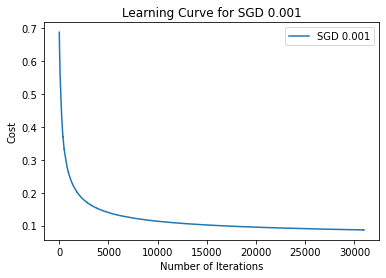

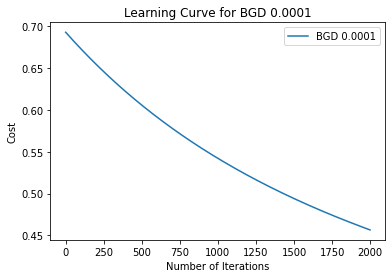

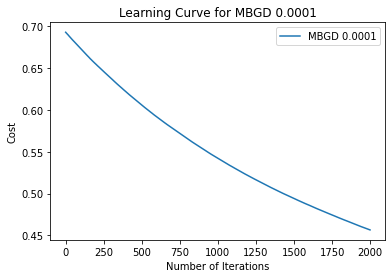

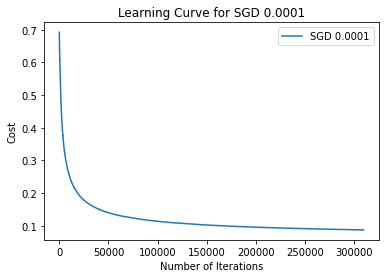

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from file
data = pd.read_csv('normData.csv')
data = data.drop(columns=['id'])  # Drop the Id column
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Split data into training and testing sets
m = len(y)
indices = np.random.permutation(m)
train_indices, test_indices = indices[:int(0.67*m)], indices[int(0.67*m):]
train_X, train_y = X[train_indices], y[train_indices]
test_X, test_y = X[test_indices], y[test_indices]

def sigmoid(z):
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))


# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

    # Batch Gradient Descent
def batch_gradient_descent(X, y, alpha, num_iters):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        error = h - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history
# Mini-batch Gradient Descent
def minibatch_gradient_descent(X, y, batch_size, alpha, num_iters):
    m,n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(num_iters):
        indices = np.random.randint(m, size=batch_size)
        X_batch, y_batch = X[indices], y[indices]
        h = sigmoid(np.dot(X_batch, theta))
        error = h - y_batch
        gradient = (1/batch_size) * np.dot(X_batch.T, error)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, alpha, num_iters):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(num_iters):
        for j in range(m):
            X_j, y_j = X[j], y[j]
            h = sigmoid(np.dot(X_j, theta))
            error = h - y_j
            gradient = error * X_j
            theta -= alpha * gradient
            cost = compute_cost(X, y, theta)
            cost_history.append(cost)
    
    return theta, cost_history

# Predict function
def predict(X, theta, threshold):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions

# Test accuracy function
def test_accuracy(X, y, theta, threshold):
    predictions = predict(X, theta, threshold)
    accuracy = np.mean(predictions == y)
    return accuracy


    # Train the logistic regression models using batch gradient descent, mini-batch gradient descent, and stochastic gradient descent
learning_rates = [0.01, 0.001, 0.0001]
num_iters = 2000
batch_size = 32
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

models = {}

for lr in learning_rates:
    models[f'BGD {lr}'] = batch_gradient_descent(train_X, train_y, alpha=lr, num_iters=num_iters)
    models[f'MBGD {lr}'] = minibatch_gradient_descent(train_X, train_y, batch_size=batch_size, alpha=lr, num_iters=num_iters)
    models[f'SGD {lr}'] = stochastic_gradient_descent(train_X, train_y, alpha=lr, num_iters=num_iters)

# Evaluate testing accuracy for each model and threshold
accuracies = {}
for key, value in models.items():
    theta = value[0]
    for threshold in thresholds:
        accuracy = test_accuracy(test_X, test_y, theta, threshold)
        accuracies[f'{key} {threshold}'] = accuracy

# Print the accuracies
for key, value in accuracies.items():
    print(f'{key}: {value}')

# Plot the learning curves for each model
for key, value in models.items():
    plt.plot(value[1], label=key)
    plt.title(f'Learning Curve for {key}')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

Accuracy For 10 Random sample

0


<ipython-input-6-87430ff7786f>:19: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
<ipython-input-6-87430ff7786f>:19: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))


BGD 0.01 0.3: 0.9574468085106383
BGD 0.01 0.4: 0.9840425531914894
BGD 0.01 0.5: 0.9840425531914894
BGD 0.01 0.6: 0.9946808510638298
BGD 0.01 0.7: 0.9680851063829787
MBGD 0.01 0.3: 0.9574468085106383
MBGD 0.01 0.4: 0.9840425531914894
MBGD 0.01 0.5: 0.9840425531914894
MBGD 0.01 0.6: 0.9946808510638298
MBGD 0.01 0.7: 0.9680851063829787
SGD 0.01 0.3: 0.9787234042553191
SGD 0.01 0.4: 0.9840425531914894
SGD 0.01 0.5: 0.9840425531914894
SGD 0.01 0.6: 0.9787234042553191
SGD 0.01 0.7: 0.9680851063829787
BGD 0.001 0.3: 0.851063829787234
BGD 0.001 0.4: 0.925531914893617
BGD 0.001 0.5: 0.9787234042553191
BGD 0.001 0.6: 0.9521276595744681
BGD 0.001 0.7: 0.9148936170212766
MBGD 0.001 0.3: 0.8457446808510638
MBGD 0.001 0.4: 0.925531914893617
MBGD 0.001 0.5: 0.9787234042553191
MBGD 0.001 0.6: 0.9521276595744681
MBGD 0.001 0.7: 0.9148936170212766
SGD 0.001 0.3: 0.9840425531914894
SGD 0.001 0.4: 0.9893617021276596
SGD 0.001 0.5: 0.9946808510638298
SGD 0.001 0.6: 0.9893617021276596
SGD 0.001 0.7: 0.98936

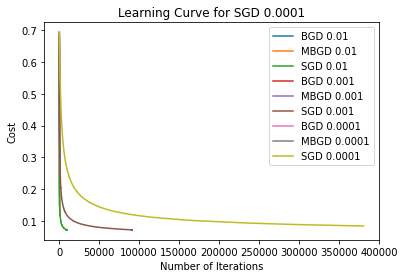

1
BGD 0.01 0.3: 0.9680851063829787
BGD 0.01 0.4: 0.9787234042553191
BGD 0.01 0.5: 0.9893617021276596
BGD 0.01 0.6: 0.9787234042553191
BGD 0.01 0.7: 0.9680851063829787
MBGD 0.01 0.3: 0.9680851063829787
MBGD 0.01 0.4: 0.9787234042553191
MBGD 0.01 0.5: 0.9893617021276596
MBGD 0.01 0.6: 0.9787234042553191
MBGD 0.01 0.7: 0.9680851063829787
SGD 0.01 0.3: 0.9840425531914894
SGD 0.01 0.4: 0.9787234042553191
SGD 0.01 0.5: 0.973404255319149
SGD 0.01 0.6: 0.9680851063829787
SGD 0.01 0.7: 0.9680851063829787
BGD 0.001 0.3: 0.8936170212765957
BGD 0.001 0.4: 0.9521276595744681
BGD 0.001 0.5: 0.973404255319149
BGD 0.001 0.6: 0.9468085106382979
BGD 0.001 0.7: 0.925531914893617
MBGD 0.001 0.3: 0.898936170212766
MBGD 0.001 0.4: 0.9521276595744681
MBGD 0.001 0.5: 0.973404255319149
MBGD 0.001 0.6: 0.9468085106382979
MBGD 0.001 0.7: 0.925531914893617
SGD 0.001 0.3: 0.973404255319149
SGD 0.001 0.4: 0.9840425531914894
SGD 0.001 0.5: 0.9787234042553191
SGD 0.001 0.6: 0.9787234042553191
SGD 0.001 0.7: 0.9734042

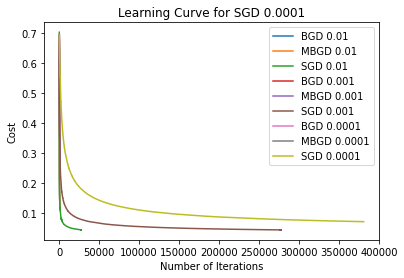

2
BGD 0.01 0.3: 0.9468085106382979
BGD 0.01 0.4: 0.9627659574468085
BGD 0.01 0.5: 0.9627659574468085
BGD 0.01 0.6: 0.973404255319149
BGD 0.01 0.7: 0.9521276595744681
MBGD 0.01 0.3: 0.9468085106382979
MBGD 0.01 0.4: 0.9627659574468085
MBGD 0.01 0.5: 0.9627659574468085
MBGD 0.01 0.6: 0.973404255319149
MBGD 0.01 0.7: 0.9521276595744681
SGD 0.01 0.3: 0.9680851063829787
SGD 0.01 0.4: 0.9680851063829787
SGD 0.01 0.5: 0.973404255319149
SGD 0.01 0.6: 0.9787234042553191
SGD 0.01 0.7: 0.9574468085106383
BGD 0.001 0.3: 0.8670212765957447
BGD 0.001 0.4: 0.9042553191489362
BGD 0.001 0.5: 0.9414893617021277
BGD 0.001 0.6: 0.9468085106382979
BGD 0.001 0.7: 0.925531914893617
MBGD 0.001 0.3: 0.8670212765957447
MBGD 0.001 0.4: 0.9042553191489362
MBGD 0.001 0.5: 0.9414893617021277
MBGD 0.001 0.6: 0.9468085106382979
MBGD 0.001 0.7: 0.925531914893617
SGD 0.001 0.3: 0.973404255319149
SGD 0.001 0.4: 0.9787234042553191
SGD 0.001 0.5: 0.9840425531914894
SGD 0.001 0.6: 0.973404255319149
SGD 0.001 0.7: 0.9680851

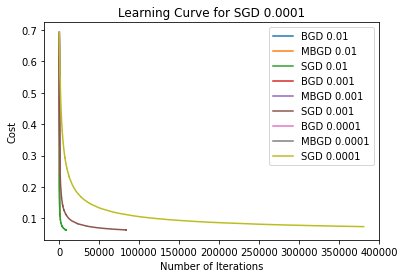

3
BGD 0.01 0.3: 0.9095744680851063
BGD 0.01 0.4: 0.9574468085106383
BGD 0.01 0.5: 0.9680851063829787
BGD 0.01 0.6: 0.973404255319149
BGD 0.01 0.7: 0.9521276595744681
MBGD 0.01 0.3: 0.9095744680851063
MBGD 0.01 0.4: 0.9521276595744681
MBGD 0.01 0.5: 0.9680851063829787
MBGD 0.01 0.6: 0.973404255319149
MBGD 0.01 0.7: 0.9521276595744681
SGD 0.01 0.3: 0.9627659574468085
SGD 0.01 0.4: 0.9627659574468085
SGD 0.01 0.5: 0.9680851063829787
SGD 0.01 0.6: 0.9680851063829787
SGD 0.01 0.7: 0.9680851063829787
BGD 0.001 0.3: 0.8085106382978723
BGD 0.001 0.4: 0.8882978723404256
BGD 0.001 0.5: 0.9414893617021277
BGD 0.001 0.6: 0.9361702127659575
BGD 0.001 0.7: 0.9042553191489362
MBGD 0.001 0.3: 0.8085106382978723
MBGD 0.001 0.4: 0.8882978723404256
MBGD 0.001 0.5: 0.9361702127659575
MBGD 0.001 0.6: 0.9361702127659575
MBGD 0.001 0.7: 0.9042553191489362
SGD 0.001 0.3: 0.9680851063829787
SGD 0.001 0.4: 0.973404255319149
SGD 0.001 0.5: 0.9787234042553191
SGD 0.001 0.6: 0.9787234042553191
SGD 0.001 0.7: 0.978

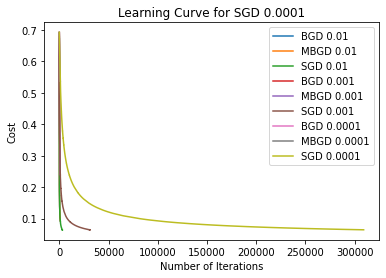

4
BGD 0.01 0.3: 0.9521276595744681
BGD 0.01 0.4: 0.9574468085106383
BGD 0.01 0.5: 0.9627659574468085
BGD 0.01 0.6: 0.9627659574468085
BGD 0.01 0.7: 0.9308510638297872
MBGD 0.01 0.3: 0.9521276595744681
MBGD 0.01 0.4: 0.9574468085106383
MBGD 0.01 0.5: 0.9627659574468085
MBGD 0.01 0.6: 0.9627659574468085
MBGD 0.01 0.7: 0.9308510638297872
SGD 0.01 0.3: 0.973404255319149
SGD 0.01 0.4: 0.9680851063829787
SGD 0.01 0.5: 0.9627659574468085
SGD 0.01 0.6: 0.9627659574468085
SGD 0.01 0.7: 0.9627659574468085
BGD 0.001 0.3: 0.8723404255319149
BGD 0.001 0.4: 0.9148936170212766
BGD 0.001 0.5: 0.9414893617021277
BGD 0.001 0.6: 0.9148936170212766
BGD 0.001 0.7: 0.9042553191489362
MBGD 0.001 0.3: 0.8723404255319149
MBGD 0.001 0.4: 0.9148936170212766
MBGD 0.001 0.5: 0.9414893617021277
MBGD 0.001 0.6: 0.9148936170212766
MBGD 0.001 0.7: 0.9042553191489362
SGD 0.001 0.3: 0.9787234042553191
SGD 0.001 0.4: 0.9787234042553191
SGD 0.001 0.5: 0.973404255319149
SGD 0.001 0.6: 0.9627659574468085
SGD 0.001 0.7: 0.95

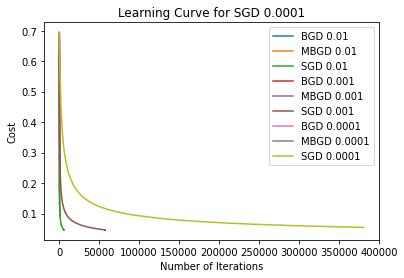

5
BGD 0.01 0.3: 0.9521276595744681
BGD 0.01 0.4: 0.9627659574468085
BGD 0.01 0.5: 0.973404255319149
BGD 0.01 0.6: 0.9468085106382979
BGD 0.01 0.7: 0.9202127659574468
MBGD 0.01 0.3: 0.9521276595744681
MBGD 0.01 0.4: 0.9627659574468085
MBGD 0.01 0.5: 0.973404255319149
MBGD 0.01 0.6: 0.9521276595744681
MBGD 0.01 0.7: 0.9202127659574468
SGD 0.01 0.3: 0.9361702127659575
SGD 0.01 0.4: 0.9414893617021277
SGD 0.01 0.5: 0.9361702127659575
SGD 0.01 0.6: 0.9414893617021277
SGD 0.01 0.7: 0.9414893617021277
BGD 0.001 0.3: 0.851063829787234
BGD 0.001 0.4: 0.9202127659574468
BGD 0.001 0.5: 0.9574468085106383
BGD 0.001 0.6: 0.925531914893617
BGD 0.001 0.7: 0.8936170212765957
MBGD 0.001 0.3: 0.851063829787234
MBGD 0.001 0.4: 0.9202127659574468
MBGD 0.001 0.5: 0.9574468085106383
MBGD 0.001 0.6: 0.925531914893617
MBGD 0.001 0.7: 0.8882978723404256
SGD 0.001 0.3: 0.9468085106382979
SGD 0.001 0.4: 0.9468085106382979
SGD 0.001 0.5: 0.9521276595744681
SGD 0.001 0.6: 0.9574468085106383
SGD 0.001 0.7: 0.941489

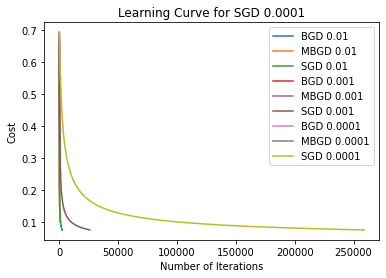

6


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from file
data = pd.read_csv('normData.csv')
data = data.drop(columns=['id'])  # Drop the Id column

def sigmoid(z):
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))


# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

    # Batch Gradient Descent
def batch_gradient_descent(X, y, alpha=0.01, num_iters=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        error = h - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history
# Mini-batch Gradient Descent
def minibatch_gradient_descent(X, y, batch_size=32, alpha=0.01, num_iters=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(num_iters):
        indices = np.random.randint(m, size=batch_size)
        X_batch, y_batch = X[indices], y[indices]
        h = sigmoid(np.dot(X_batch, theta))
        error = h - y_batch
        gradient = (1/batch_size) * np.dot(X_batch.T, error)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, alpha=0.01, num_iters=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(num_iters):
        for j in range(m):
            X_j, y_j = X[j], y[j]
            h = sigmoid(np.dot(X_j, theta))
            error = h - y_j
            gradient = error * X_j
            theta -= alpha * gradient
            cost = compute_cost(X, y, theta)
            cost_history.append(cost)
    
    return theta, cost_history


# Predict function
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions

# Test accuracy function
def test_accuracy(X, y, theta, threshold=0.5):
    predictions = predict(X, theta, threshold)
    accuracy = np.mean(predictions == y)
    return accuracy


    # Train the logistic regression models using batch gradient descent, mini-batch gradient descent, and stochastic gradient descent
learning_rates = [0.01, 0.001, 0.0001]
num_iters = 1000
batch_size = 32
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

models = {}

for i in range(10):
    # Train the logistic regression models using batch gradient descent, mini-batch gradient descent, and stochastic gradient descent
    # data = data.sample(frac=1)
    print(i)
    train_data = data.sample(frac=0.67, random_state=i)
    test_data = data.drop(train_data.index)
    train_X = train_data.iloc[:, 1:].values
    test_X = test_data.iloc[:, 1:].values
    test_y = test_data.iloc[:, 0].values
    train_y= train_data.iloc[:, 0].values
    # split the data into training and testing sets

    for lr in learning_rates:
        models[f'BGD {lr}'] = batch_gradient_descent(train_X, train_y, alpha=lr, num_iters=num_iters)
        models[f'MBGD {lr}'] = minibatch_gradient_descent(train_X, train_y, batch_size=batch_size, alpha=lr, num_iters=num_iters)
        models[f'SGD {lr}'] = stochastic_gradient_descent(train_X, train_y, alpha=lr, num_iters=num_iters)

      # Evaluate testing accuracy for each model and threshold
    accuracies = {}
    for key, value in models.items():
        theta = value[0]
        for threshold in thresholds:
            accuracy = test_accuracy(test_X, test_y, theta, threshold)
            accuracies[f'{key} {threshold}'] = accuracy

    # Print the accuracies
    for key, value in accuracies.items():
        print(f'{key}: {value}')

    # Plot the learning curves for each model
    for key, value in models.items():
        plt.plot(value[1], label=key)
        plt.title(f'Learning Curve for {key}')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Cost')
    plt.legend()
    plt.show()


